In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.dates as mdates

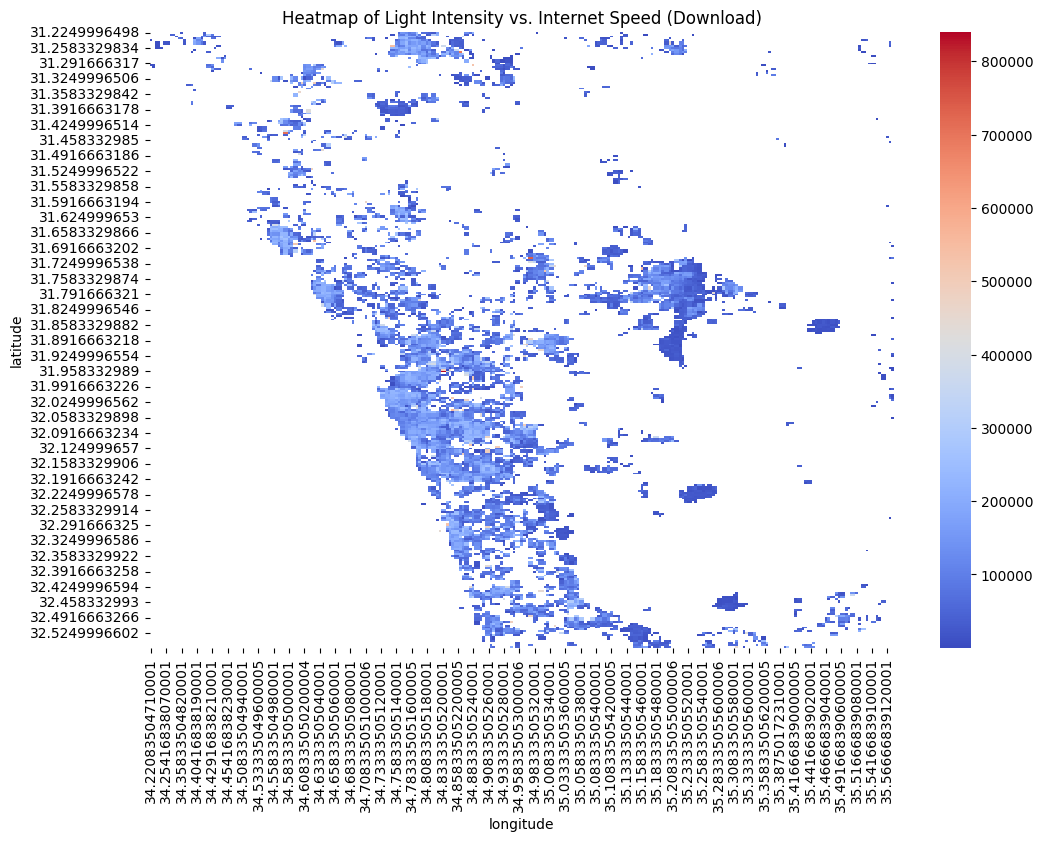

In [ ]:
# Load your dataset
data = pd.read_csv('integrated_data_pse_2021.csv')

# Create a heatmap showing light intensity vs. internet download speed (avg_d_kbps)
heatmap_data = data[['longitude', 'latitude', 'light_intensity', 'avg_d_kbps']]
heatmap_data = heatmap_data.dropna()

# Create a pivot table to prepare for heatmap (you can aggregate by geographic grid if needed)
heatmap_pivot = heatmap_data.pivot_table(index='latitude', columns='longitude', values='avg_d_kbps')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_pivot, cmap='coolwarm')
plt.title('Heatmap of Light Intensity vs. Internet Speed (Download)')
plt.show()


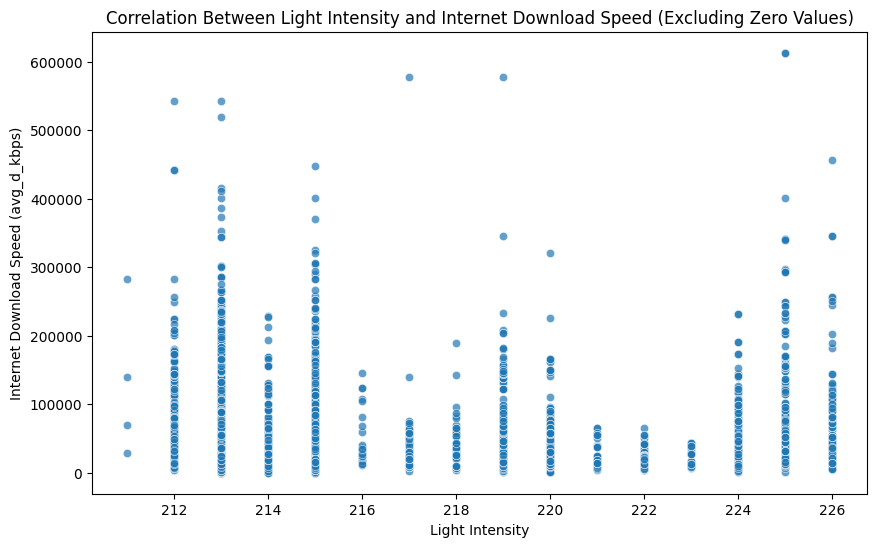

In [5]:
plt.figure(figsize=(10, 6))

# Filter out rows where light_intensity or avg_d_kbps are zero or NaN
filtered_data = data[(data['light_intensity'] > 0) & (data['avg_d_kbps'] > 0)]

# Scatter plot
sns.scatterplot(x=filtered_data['light_intensity'], y=filtered_data['avg_d_kbps'], alpha=0.7)
plt.title('Correlation Between Light Intensity and Internet Download Speed (Excluding Zero Values)')
plt.xlabel('Light Intensity')
plt.ylabel('Internet Download Speed (avg_d_kbps)')
plt.show()


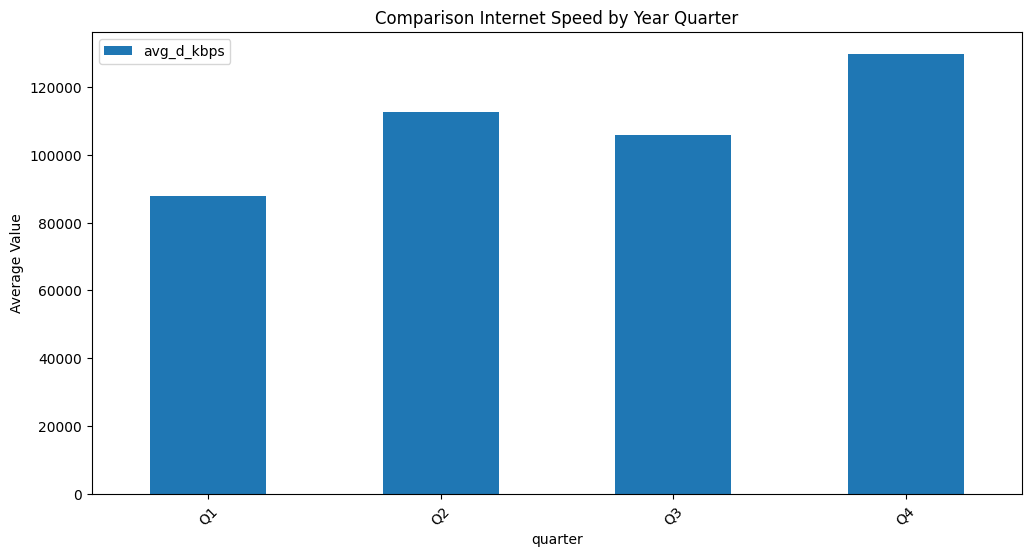

In [14]:
# Group data by country and calculate average light intensity and internet download speed
grouped_data = data.groupby('quarter')[['avg_d_kbps']].mean().reset_index()

# Bar plot for comparison
fig, ax = plt.subplots(figsize=(12, 6))
grouped_data.set_index('quarter')[[ 'avg_d_kbps']].plot(kind='bar', ax=ax)
plt.title('Comparison Internet Speed by Year Quarter')
plt.ylabel('Average Value')
plt.xlabel('quarter')
plt.xticks(rotation=45)
plt.show()


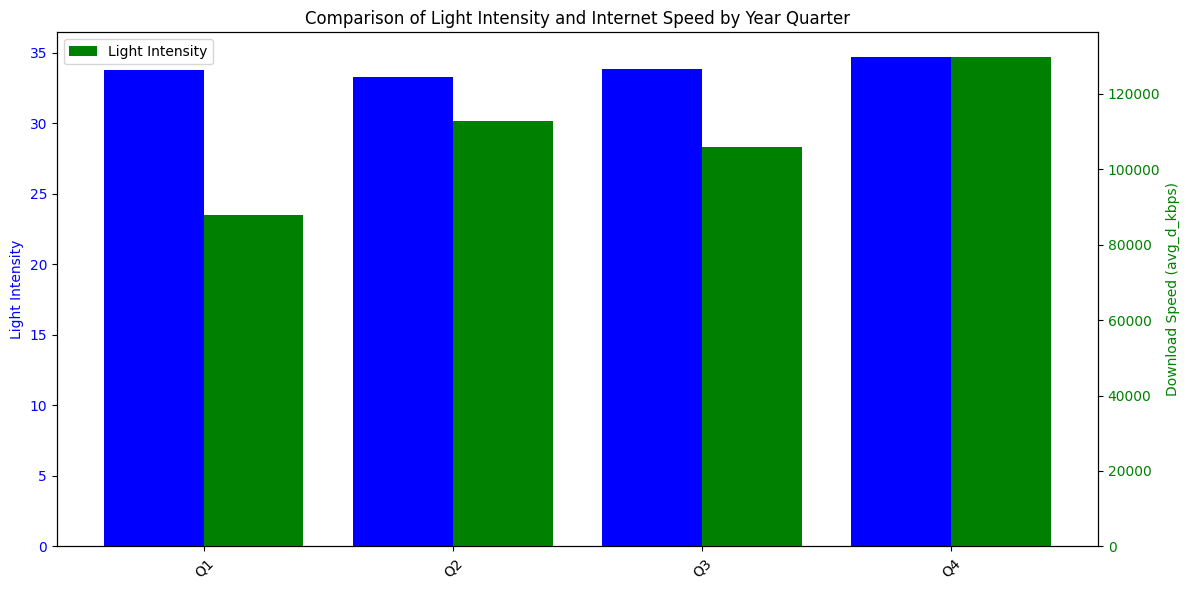

In [11]:
# Group data by quarter and calculate average light intensity and download speed
grouped_data = data.groupby('quarter')[['light_intensity', 'avg_d_kbps']].mean().reset_index()

# Create a dual-axis bar plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot light intensity on the primary y-axis
bar_width = 0.4
x = range(len(grouped_data))
ax1.bar(x, grouped_data['light_intensity'], width=bar_width, color='b', label='Light Intensity')
ax1.set_ylabel('Light Intensity', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Plot internet download speed on the secondary y-axis
ax2 = ax1.twinx()
ax2.bar([i + bar_width for i in x], grouped_data['avg_d_kbps'], width=bar_width, color='g', label='Download Speed')
ax2.set_ylabel('Download Speed (avg_d_kbps)', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Set the x-axis
ax1.set_xticks([i + bar_width / 2 for i in x])
ax1.set_xticklabels(grouped_data['quarter'], rotation=45)

# Title and legend
plt.title('Comparison of Light Intensity and Internet Speed by Year Quarter')
fig.tight_layout()
plt.legend(['Light Intensity', 'Download Speed'], loc='upper left')
plt.show()


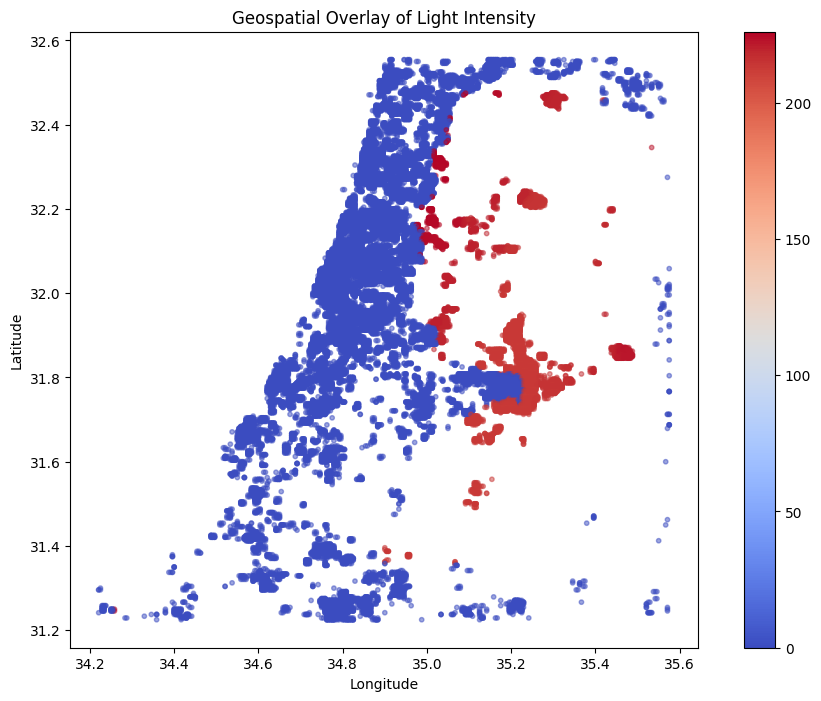

In [16]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Create GeoDataFrame
geometry = [Point(xy) for xy in zip(data['longitude'], data['latitude'])]
gdf = gpd.GeoDataFrame(data, geometry=geometry)

# Plot the geospatial data
fig, ax = plt.subplots(figsize=(12, 8))
gdf.plot(ax=ax, column='light_intensity', cmap='coolwarm', legend=True, alpha=0.5, markersize=10)

# Set plot title and labels
plt.title('Geospatial Overlay of Light Intensity')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [31]:
# Create a 2D density plot for light intensity
plt.figure(figsize=(10, 6))
sns.kdeplot(x=pd['longitude'], y=pd['latitude'], fill=True, cmap='viridis', weights=pd['light_intensity'], alpha=0.6)
plt.title('Regional Variations in Light Intensity')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Light Intensity')
plt.show()

# Create a 2D density plot for download speed
plt.figure(figsize=(10, 6))
sns.kdeplot(x=pd['longitude'], y=pd['latitude'], fill=True, cmap='plasma', weights=pd['avg_d_kbps'], alpha=0.6)
plt.title('Regional Variations in Download Speed')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Download Speed (kbps)')
plt.show()

TypeError: 'module' object is not subscriptable

<Figure size 1000x600 with 0 Axes>